#### 1. Data Preparation:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

s1= pd.read_excel(r"C:\Users\Parvathy Shine\Desktop\Assignments\13. Decision Tree\Decision Tree\heart_disease.xlsx")
s1 # Showing the description of each columns

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
5,restecg,"ecg observation at resting condition, -- Val..."
6,thalch,maximum heart rate achieved
7,exang,exercise induced angina
8,oldpeak,ST depression induced by exercise relative to ...
9,slope,the slope of the peak exercise ST segment


In [2]:
xls = pd.ExcelFile(r"C:\Users\Parvathy Shine\Desktop\Assignments\13. Decision Tree\Decision Tree\heart_disease.xlsx")
print(xls.sheet_names) #There are 2 sheets

['Description', 'Heart_disease']


In [3]:
df = pd.read_excel(xls, sheet_name='Heart_disease')  # Running the sheet with the info
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


#### 2. Exploratory Data Analysis (EDA):

In [4]:
df.info() # A mix of all the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [6]:
print(df.isnull().sum()) # missing values in oldpeak

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [7]:
#df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True) # Handling the missing value in oldpeak

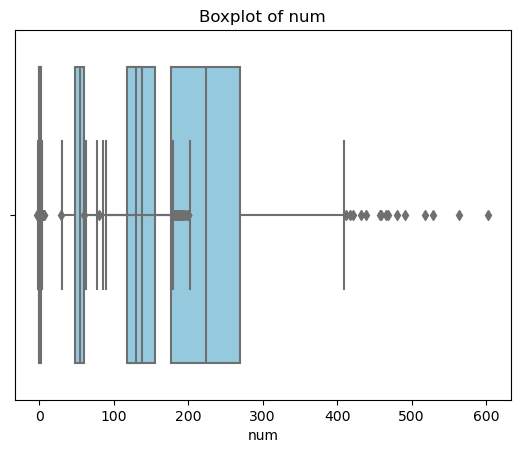

In [8]:
#Seperating numerical and categorical columns:

cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(exclude=['object','boolean']).columns

# Checking for outliers using boxplot for numerical columns:

for col in num_cols:
    sns.boxplot(data=df,x=col,color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.show

#Outliers can be seen in trestbps, chol

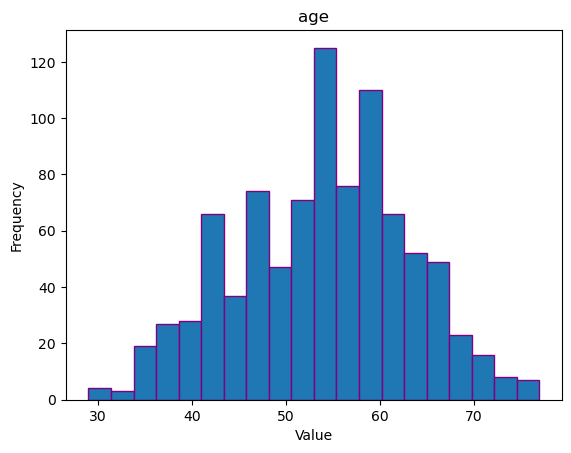

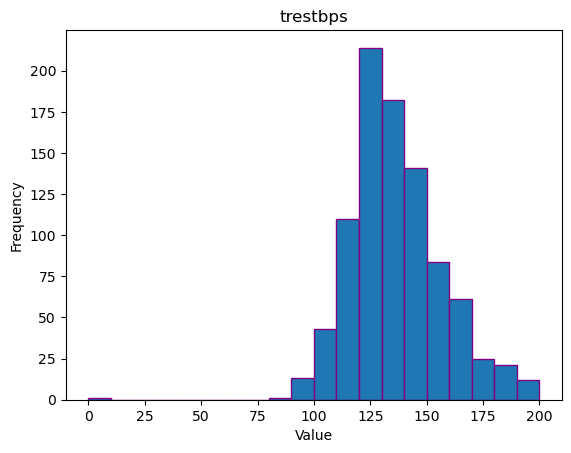

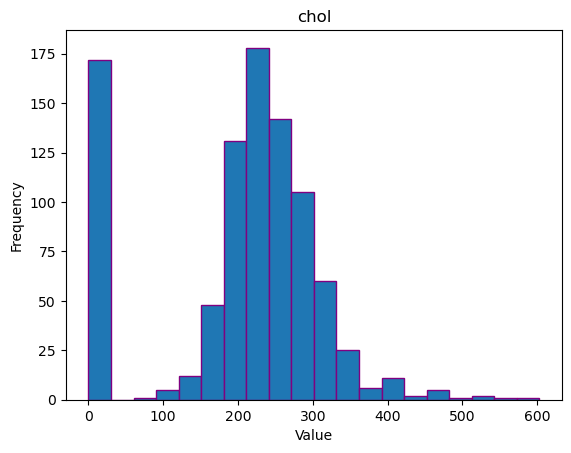

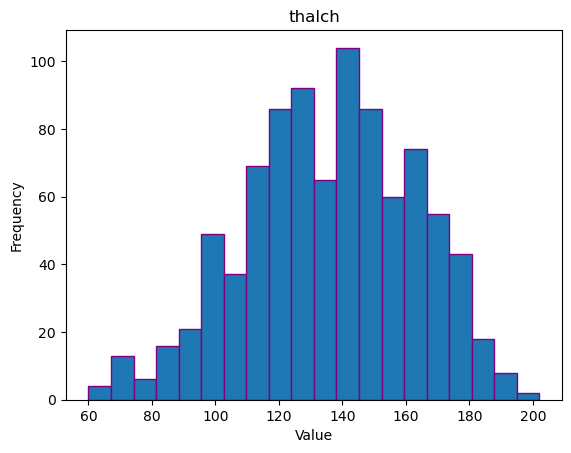

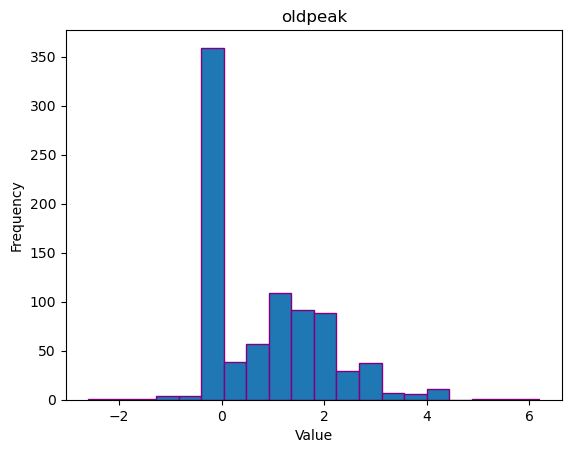

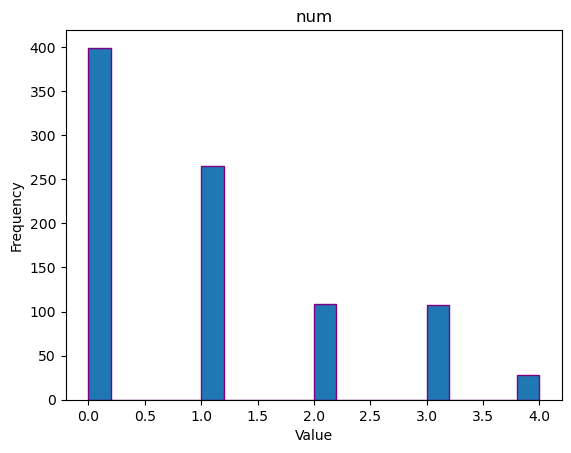

In [9]:
# Visusalise the ditribution by histograms for numerical columns
for col in num_cols:
    plt.hist(df[col], bins=20, edgecolor='purple')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

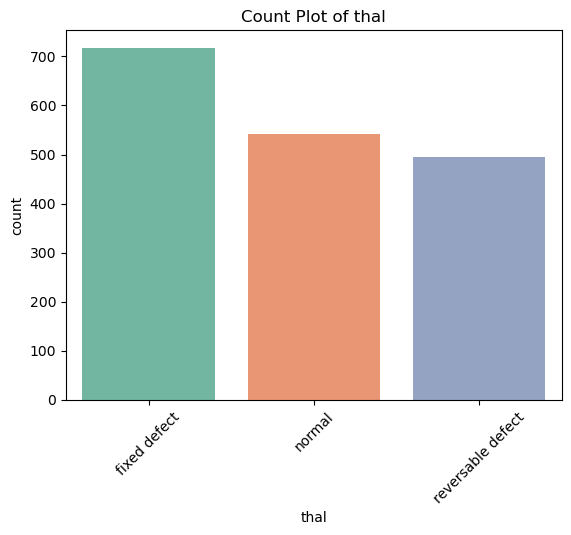

In [10]:
# Plot count plots for visualising the distributions for categorical columns

for col in cat_cols:
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)  # Rotate x labels for readability
    plt.show
    

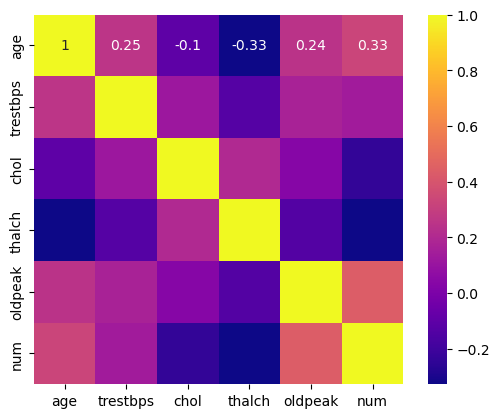

In [11]:
# Visualize the correlation matrix for numerical columns
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='plasma', square=True)
plt.show()

#### 3. Feature Engineering:

In [12]:
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True) # Handling the missing value in oldpeak

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [14]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.5,downsloping,fixed defect,4


In [15]:
# Scaling both the numerical features and categorcial features
no_cols=df.select_dtypes(exclude=['object']).columns # Select all the columns bcoz we didnt use boolean for visualisations.

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df[col] = df[col].astype(str) # Since there is boolean values in our dataset 
    df[col] = le.fit_transform(df[col])

# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[no_cols] = scaler.fit_transform(df[no_cols])

In [16]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.006027,1,3,0.567394,0.281297,1.976894,0,0.524183,1,1.354403,0,0,-0.881977
1,-1.397560,1,1,0.076967,0.013526,-0.505844,1,-0.147705,1,-0.815718,1,0,-0.881977
2,0.350503,1,0,0.322181,-0.084656,-0.505844,1,0.449529,1,-0.438305,1,0,-0.881977
3,-0.195767,1,3,-0.756760,-0.138211,-0.505844,0,2.017268,1,-0.815718,1,0,-0.881977
4,0.350503,1,0,-1.149102,-0.004325,-0.505844,1,-0.371668,3,0.599578,1,0,-0.881977
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.086513,1,0,-0.413461,-1.798388,-0.505844,1,-0.595631,1,0.599578,2,2,2.615119
904,0.896773,1,0,1.597292,-0.281021,-0.505844,2,-0.595631,3,2.014874,1,2,2.615119
905,0.241249,1,2,1.793463,-1.798388,-0.505844,0,-0.483649,3,1.543109,0,1,2.615119
906,0.241249,1,2,0.518352,0.058155,1.976894,2,-1.155538,2,-0.343952,0,0,2.615119


#### 4. Decision Tree Classification:

In [17]:
#Target and Features
X = df.drop('num', axis=1)
y = df['num']

# Training and Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
y_train = y_train.astype(int)
y_test = y_test.astype(int)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
# Predict
y_pred = dt_model.predict(X_test)

# Predict probabilities for positive class (for ROC-AUC)
y_proba = dt_model.predict_proba(X_test)[:, 1]

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
# Precision
print("Precision:", precision_score(y_test, y_pred,average='weighted'))
# Recall
print("Recall:", recall_score(y_test, y_pred,average='weighted'))
# F1 Score
print("F1 Score:", f1_score(y_test, y_pred,average='weighted'))
# ROC-AUC (for binary only)
if len(y.unique()) == 2:
    print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

Accuracy: 0.762114537444934
Precision: 0.7809261568977416
Recall: 0.762114537444934
F1 Score: 0.7713878024658622


In [20]:
# Classification Report 
print(classification_report(y_test, y_pred, digits=3))

# 2. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0      0.885     0.862     0.873       196
           1      0.154     0.160     0.157        25
           2      0.000     0.000     0.000         6

    accuracy                          0.762       227
   macro avg      0.346     0.341     0.343       227
weighted avg      0.781     0.762     0.771       227

[[169  20   7]
 [ 18   4   3]
 [  4   2   0]]


#### 5. Hyperparameter Tuning:

In [21]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter tuning space
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}
Best Score: 0.8296371833404894


#### 6. Model Evaluation and Analysis:

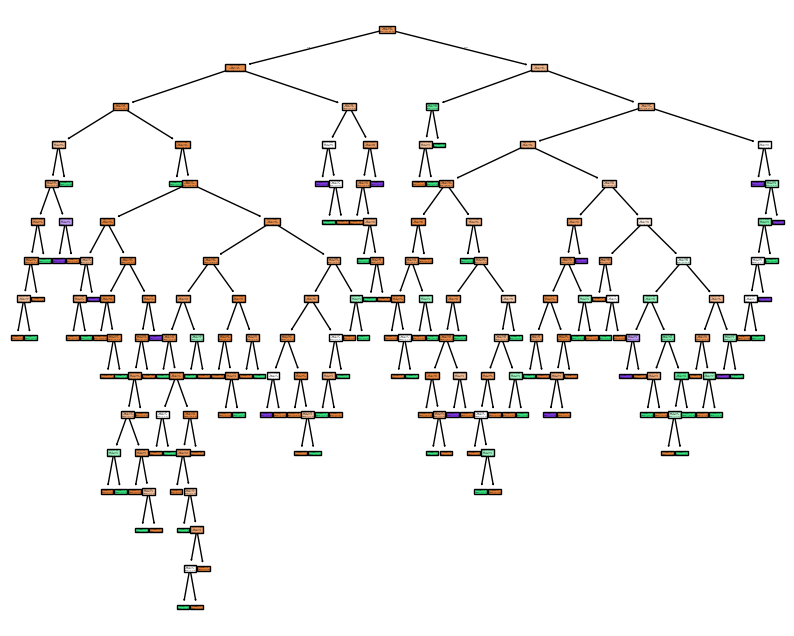

In [22]:
from sklearn.tree import plot_tree

# Visualize the decision tree structure
plt.figure(figsize=(10, 8))
plot_tree(dt_model, filled=True)
plot_params = {'fontsize': 8}
plt.show()

#### Info:

1. Some common hyperparameters of decision tree models, and how do they affect the model's performance?

<br>Main Parameters:
<br>a. Learning Rate - controls how quickly the model learns from the data
<br>b. Batch Size - Number of samples used to update the model parameters
<br>c. Number of Epochs - Number of times the model see the training data
<br>d. Regularization - Prevents overfitting by adding a penalty term
<br>e. Depth/Complexity - Number of layers ir complexity of the model

Key Parameters:
<br>a. max_depth - Limits the depth of the tree to prevent overfitting. Smaller values = simpler model; larger = more complex.
<br>b. min_samples_split - Minimum samples needed to split a node. Higher values prevent splitting on small samples, reducing overfitting.
<br>c. min_samples_leaf - Minimum samples required at a leaf node. Helps smooth the model and avoid leaves with very few samples.
<br>d. criterion - Metric to measure the quality of a split. Options: "gini" (Gini impurity) or "entropy" (information gain).
<br>e. max_features - Number of features to consider when looking for the best split. Limits feature usage to reduce overfitting and improve speed.
<br>f. max_leaf_nodes - Maximum number of leaf nodes in the tree. Controls complexity similarly to max_depth.
    
2. Difference between the Label encoding and One-hot encoding?

<br>Label encoding : assign a unique integer to each category and implies an order.
<br>One-Hot Encoding : Creates a new binary feature for each category but there is no order
<br>    Both are used for converting categorical to numerical data.